In [ ]:
KNN Classification Case Study
-This time we try to use a classic non-probabilistic classifiers(KNN) to identify fruit type

In [ ]:
Target:
-Train a KNN classifier
-Use cross validation to choose best parameter(k value)
-Check the ROC and AUC value


Step 1: Data Preparation

In [37]:
import warnings
warnings.filterwarnings('ignore')

Text(0, 0.5, 'Height')

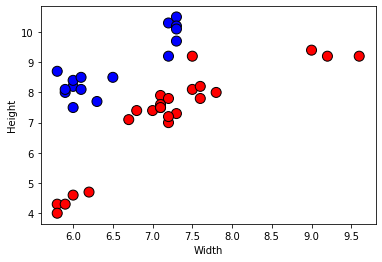

In [38]:
import numpy as np
%matplotlib inline
import pylab as plt
from matplotlib.colors import ListedColormap

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

data = np.loadtxt('orange_lemon.txt', delimiter=',') # load fruit data
X = data[:,1:3]
t = data[:,0] #fruit type
plt.scatter(X[:, 0], X[:, 1], c=t, cmap=cmap_bold, edgecolor='k', s=100)
plt.xlabel('Width')
plt.ylabel('Height')

In [ ]:
Step2: train the data using KNN classifier

In [39]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


Text(0.5, 1.0, 'KNN (k = 11)')

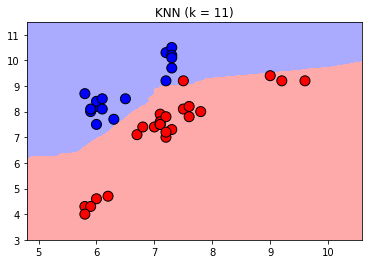

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

n_neighbors = 11 # we use k = 11 to train the model initially and see what is going on.
clf = KNeighborsClassifier(n_neighbors)
clf.fit(X, t)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=t, cmap=cmap_bold,
            edgecolor='k', s=100)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("KNN (k = %i)"
          % (n_neighbors))

In [ ]:
Step3: Cross Validation for parameter selection

0.022222222222222143


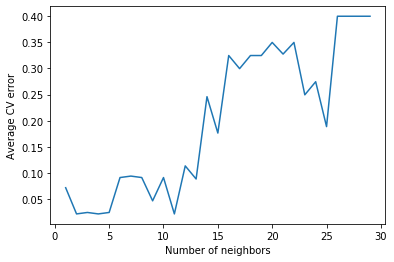

In [41]:
cv_scores = []
# try to find the best parameter through a range (1, 30)
for i in range(1,30,1):
    knn_cv = KNeighborsClassifier(n_neighbors=i)
    cv_scores.append(1-np.mean(cross_val_score(knn_cv, X, t, cv=5))) # typically cv = 5 or cv = 10
    
plt.plot(np.arange(1,30,1),cv_scores)
plt.xlabel('Number of neighbors')
plt.ylabel('Average CV error')
print(np.min(cv_scores)) # the min error value is arround k = 11!

Text(0.5, 1.0, 'KNN (k = 40)')

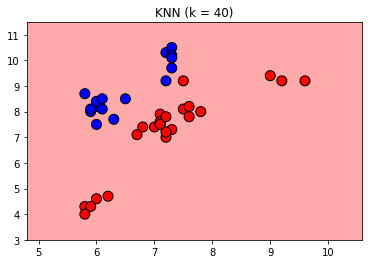

In [42]:
n_neighbors = 40
clf = KNeighborsClassifier(n_neighbors)
clf.fit(X, t)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=t, cmap=cmap_bold,
            edgecolor='k', s=100)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("KNN (k = %i)"
          % (n_neighbors))
#we can see when the k value gets bigger, the class imbalance is getting worse

In [ ]:
Step 4: Try out the 'weight' parameter:
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
weight type:
1. uniform(All points in each neighborhood are weighted equally)
2. distance(weight points by the inverse of their distance. in this case, 
closer neighbors of a query point will have a greater influence than neighbors which are further away.)
3. self-defined function

Text(0.5, 1.0, 'KNN (k = 40)')

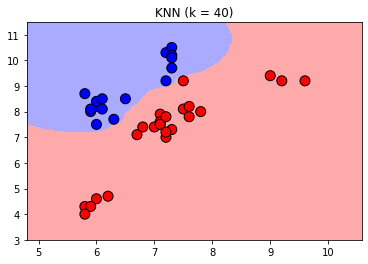

In [43]:
n_neighbors = 40
clf = KNeighborsClassifier(n_neighbors, weights="distance")
clf.fit(X, t)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=t, cmap=cmap_bold,
            edgecolor='k', s=100)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("KNN (k = %i)" % (n_neighbors))